In [ ]:
#Sonia Garfinkel
#2018 West LA Traffic Collision Data

In [1]:
import pandas as pd
import geopandas as gpd

In [9]:
tcd = gpd.read_file('Traffic_Collision_Data_2018.csv')

In [13]:
type(tcd)
#tcd is a dataframe

geopandas.geodataframe.GeoDataFrame

In [12]:
tcd.head()
#shows first five lines of the dataset

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry
0,190815321,09/09/2019,09/09/2018,1445,08,West LA,0855,997,TRAFFIC COLLISION,3008 3025 3035 3037 3102 3401 3701 4027,37,F,W,101,STREET,WESTWOOD BL,SANTA MONICA BL,"(34.0499, -118.437)",None
1,180817108,10/01/2018,09/30/2018,2210,08,West LA,0855,997,TRAFFIC COLLISION,3035 3037 3101 3401 3701 3027 3003 4027,57,F,O,101,STREET,WESTWOOD,MASSACHUSETTS AV,"(34.0519, -118.4388)",None
2,190814307,08/17/2018,08/17/2018,1135,08,West LA,0827,997,TRAFFIC COLLISION,3004 3028 3030 3035 3036 3101 3401 3701 4008,28,M,W,101,STREET,BEVERLY CT,SUNSET BL,"(34.0638, -118.4703)",None
3,180811836,06/15/2018,06/15/2018,1300,08,West LA,0857,997,TRAFFIC COLLISION,3008 3026 3029 3035 3036 3101 3401 3701 4027,26,M,W,101,STREET,GLENVILLE DR,PICO BL,"(34.0553, -118.3928)",None
4,190804496,10/15/2018,10/15/2018,1345,08,West LA,0853,997,TRAFFIC COLLISION,3004 3026 3029 3035 3036 3104 3401 3701 4008,,,,101,STREET,NATIONAL BL,OVERLAND,"(34.0445, -118.4491)",None


In [15]:
tcd.shape
#2514 rows, 19 columns. Meaning 2,514 occurances of Traffic Collisions in West LA in 2018.
#Hopefully we can define what a traffic collision is. 

(2514, 19)

In [16]:
tcd.info

<bound method DataFrame.info of       DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
0     190815321    09/09/2019    09/09/2018          1445      08   West LA   
1     180817108    10/01/2018    09/30/2018          2210      08   West LA   
2     190814307    08/17/2018    08/17/2018          1135      08   West LA   
3     180811836    06/15/2018    06/15/2018          1300      08   West LA   
4     190804496    10/15/2018    10/15/2018          1345      08   West LA   
...         ...           ...           ...           ...     ...       ...   
2509  190804533    01/13/2019    01/12/2018          1200      08   West LA   
2510  190805231    01/29/2019    01/29/2018          1340      08   West LA   
2511  190805973    02/15/2019    11/25/2018          1730      08   West LA   
2512  190804939    01/23/2019    01/23/2018          1155      08   West LA   
2513  190804878    01/22/2019    01/22/2018          1617      08   West LA   

     Reporting Dist

In [18]:
tcd.columns.to_list()
#See the column names

['DR Number',
 'Date Reported',
 'Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'Reporting District',
 'Crime Code',
 'Crime Code Description',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Premise Code',
 'Premise Description',
 'Address',
 'Cross Street',
 'Location',
 'geometry']

In [32]:
# show a dataframe with a subset of columns
# this means, within pedcol, keep these columns
tcd[['DR Number','Date Occurred','Victim Age','Victim Sex','Victim Descent','MO Codes','Address','Cross Street','Location']]

,DR Number,Date Occurred,Victim Age,Victim Sex,Victim Descent,MO Codes,Address,Cross Street,Location
0,190815321,09/09/2018,37,F,W,3008 3025 3035 3037 3102 3401 3701 4027,WESTWOOD BL,SANTA MONICA BL,"(34.0499, -118.437)"
1,180817108,09/30/2018,57,F,O,3035 3037 3101 3401 3701 3027 3003 4027,WESTWOOD,MASSACHUSETTS AV,"(34.0519, -118.4388)"
2,190814307,08/17/2018,28,M,W,3004 3028 3030 3035 3036 3101 3401 3701 4008,BEVERLY CT,SUNSET BL,"(34.0638, -118.4703)"
3,180811836,06/15/2018,26,M,W,3008 3026 3029 3035 3036 3101 3401 3701 4027,GLENVILLE DR,PICO BL,"(34.0553, -118.3928)"
4,190804496,10/15/2018,,,,3004 3026 3029 3035 3036 3104 3401 3701 4008,NATIONAL BL,OVERLAND,"(34.0445, -118.4491)"
...,...,...,...,...,...,...,...,...,...
2509,190804533,01/12/2018,99,,,3011 3028 3030 3034 3037 3101 3401 3701 4027,SUNSET BL,ROCKINGHAM,"(34.0582, -118.4927)"
2510,190805231,01/29/2018,,,,3011 3028 3034 3037 3101 3401 3701 4027,LA GRANGE AV,WESTWOOD BL,"(34.0467, -118.4341)"
2511,190805973,11/25/2018,27,F,W,3008 3026 3035 3037 3101 3401 3701 4027,OHIO AV,PURDUE AV,"(34.0473, -118.4519)"
2512,190804939,01/23/2018,45,M,H,3004 3028 3030 3035 3037 3101 3401 3701 4027,SUNSET BL,CHURCH LN,"(34.0724, -118.4674)"


In [33]:
# List of desired column names
desired_columns = ['DR Number','Date Occurred','Victim Age','Victim Sex','Victim Descent','MO Codes','Address','Cross Street','Location']

#Subset based on desired columns
tcd[desired_columns].sample(5)

,DR Number,Date Occurred,Victim Age,Victim Sex,Victim Descent,MO Codes,Address,Cross Street,Location
176,180805668,02/02/2018,60,M,W,3003 3026 3029 3035 3036 3101 3401 3701 4007,LA CIENEGA BL,SATURN ST,"(34.0516, -118.3762)"
273,180805507,02/02/2018,82,M,O,3036 3004 3026 3035 3101 3401 3701 4008,MALCOLM AV,WILSHIRE BL,"(34.0599, -118.4397)"
502,180807085,03/08/2018,33,M,O,3034 3003 3025 3037 3101 3401 3701 4027,WELLWORTH AV,GLENDON AV,"(34.057, -118.4428)"
1295,180811152,05/31/2018,24,F,W,3004 3028 3030 3035 3037 3101 3401 3701 4027,SUNSET BL,BEVERLY GLEN,"(34.0822, -118.4349)"
78,180804229,01/05/2018,,M,W,3004 3028 3030 3035 3037 3101 3401 3701 4008,WILSHIRE BL,WESTGATE AV,"(34.0467, -118.4643)"


In [35]:
#Create a second trimmed dataframe
tcd2=tcd[desired_columns].copy()

In [36]:
import folium

In [37]:
tcd2

,DR Number,Date Occurred,Victim Age,Victim Sex,Victim Descent,MO Codes,Address,Cross Street,Location
0,190815321,09/09/2018,37,F,W,3008 3025 3035 3037 3102 3401 3701 4027,WESTWOOD BL,SANTA MONICA BL,"(34.0499, -118.437)"
1,180817108,09/30/2018,57,F,O,3035 3037 3101 3401 3701 3027 3003 4027,WESTWOOD,MASSACHUSETTS AV,"(34.0519, -118.4388)"
2,190814307,08/17/2018,28,M,W,3004 3028 3030 3035 3036 3101 3401 3701 4008,BEVERLY CT,SUNSET BL,"(34.0638, -118.4703)"
3,180811836,06/15/2018,26,M,W,3008 3026 3029 3035 3036 3101 3401 3701 4027,GLENVILLE DR,PICO BL,"(34.0553, -118.3928)"
4,190804496,10/15/2018,,,,3004 3026 3029 3035 3036 3104 3401 3701 4008,NATIONAL BL,OVERLAND,"(34.0445, -118.4491)"
...,...,...,...,...,...,...,...,...,...
2509,190804533,01/12/2018,99,,,3011 3028 3030 3034 3037 3101 3401 3701 4027,SUNSET BL,ROCKINGHAM,"(34.0582, -118.4927)"
2510,190805231,01/29/2018,,,,3011 3028 3034 3037 3101 3401 3701 4027,LA GRANGE AV,WESTWOOD BL,"(34.0467, -118.4341)"
2511,190805973,11/25/2018,27,F,W,3008 3026 3035 3037 3101 3401 3701 4027,OHIO AV,PURDUE AV,"(34.0473, -118.4519)"
2512,190804939,01/23/2018,45,M,H,3004 3028 3030 3035 3037 3101 3401 3701 4027,SUNSET BL,CHURCH LN,"(34.0724, -118.4674)"


In [30]:
# Getting a count for Victim Descent in the data. 
tcd2['Victim Descent'].value_counts()
#288 counts are blank

Victim Descent
W    912
O    436
H    434
     288
B    201
A    126
X     94
F      7
C      5
U      5
J      3
P      1
K      1
G      1
Name: count, dtype: int64

In [31]:
# Getting a count for Victim Age in the data. 
tcd2['Victim Age'].value_counts()
# Shows 368 victimes did not have their age counted
# Shows the highest two ages of victims are 28 and 27 years old

Victim Age
      368
28     79
27     76
32     64
26     64
     ... 
91      2
87      1
95      1
85      1
98      1
Name: count, Length: 74, dtype: int64

In [38]:
# Getting a count for MO Codes
tcd2['MO Codes'].value_counts()

MO Codes
3006 3028 3030 3035 3037 3101 3401 3701 4027    193
3004 3028 3030 3035 3037 3101 3401 3701 4027    161
3004 3028 3030 3035 3037 3101 3401 3701 4008    151
3006 3028 3030 3035 3037 3101 3401 3701 4008    118
3004 3026 3035 3037 3101 3401 3701 4027         107
                                               ... 
3004 3028 3034 3037 3401 3701 4027 3101           1
3006 3026 3034 3037 3101 3401 3701 4027           1
3008 3025 3035 3037 3104 3401 3701 4008           1
3037 3004 3025 3035 3101 3401 3701 4027           1
3006 3028 3030 3035 3037 3104 3401 3701 4008      1
Name: count, Length: 556, dtype: int64

In [ ]:
# This is the most common set of MO Codes for a traffic collision, and their meanings:
# Source: https://data.lacity.org/api/views/d5tf-ez2w/files/8957b3b1-771a-4686-8f19-281d23a11f1b?download=true&filename=MO_CODES_Numerical_20180627.pdf
#3006 3028 3030 3035 3037 3101 3401 3701 4027
#3006: Veh vs Parked Veh
#3028: (N) Non Injury
#3030: Hit and Run Misd
#3035: City Property Involved - No
#3037: At Intersection - No
#3101: PCF (A) In the Narrative
#3401: Type of Collision
#3701: Movement Preceding Collision
#4027: West Traffic (WTD)

#The second most common starting MO Code is: 3004
#3004: Veh vs Veh

In [39]:
#See if I can save MO Code as a variable
# MO = MO Codes
MO_count = tcd2['MO Codes'].value_counts()

In [40]:
MO_count

MO Codes
3006 3028 3030 3035 3037 3101 3401 3701 4027    193
3004 3028 3030 3035 3037 3101 3401 3701 4027    161
3004 3028 3030 3035 3037 3101 3401 3701 4008    151
3006 3028 3030 3035 3037 3101 3401 3701 4008    118
3004 3026 3035 3037 3101 3401 3701 4027         107
                                               ... 
3004 3028 3034 3037 3401 3701 4027 3101           1
3006 3026 3034 3037 3101 3401 3701 4027           1
3008 3025 3035 3037 3104 3401 3701 4008           1
3037 3004 3025 3035 3101 3401 3701 4027           1
3006 3028 3030 3035 3037 3104 3401 3701 4008      1
Name: count, Length: 556, dtype: int64

<Axes: xlabel='MO Codes'>

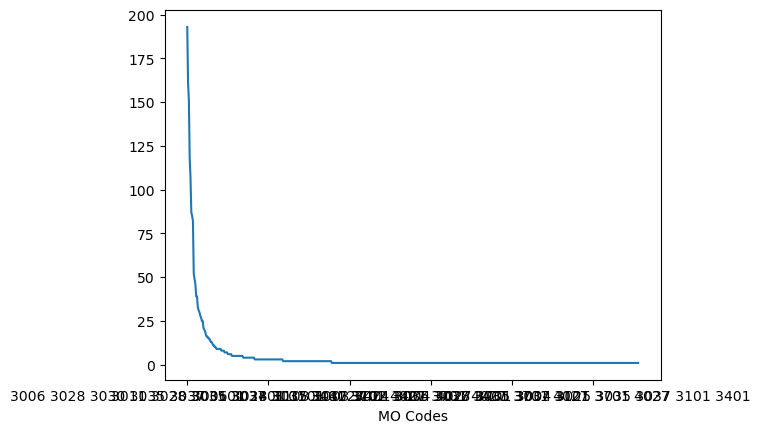

In [41]:
MO_count.plot()
# Shows some kind of graph
# 3006 = Veh v. Parked Veh, meaning that most of the traffic collisions happen with a driver
# Driving into a parked car

<Axes: title={'center': 'Types of Collisions'}, xlabel='MO Codes'>

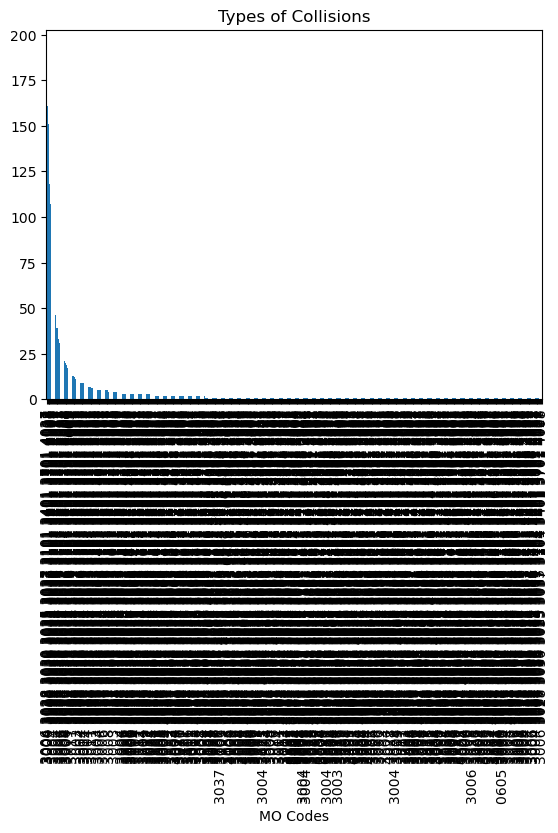

In [42]:
# I'm not sure how to get a good graph of this kind of data
# I want to parse out the indivual MO Codes to show what the most frequent MO Code is,
# But all the codes for each collision are put together, so I am going to need to seperate
# Them out somehow. 
MO_count.plot.bar(x = 'MO Codes', y = 'count', title = 'Types of Collisions')